In [2]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics

In [3]:
raw_data = pd.read_csv('/Users/zaidfarooqui/Desktop/Studies/External_Courses/Python_Projects/Python_Files/Data-05-05-product-technical-issues.csv')
print(raw_data.dtypes)
print("This is how the data looks like: ", raw_data.head)

PROBLEM_TYPE             object
COUNT                     int64
AVG_CALLS_TO_RESOLVE    float64
AVG_RESOLUTION_TIME       int64
REOCCUR_RATE            float64
REPLACEMENT_RATE        float64
dtype: object
This is how the data looks like:  <bound method NDFrame.head of                          PROBLEM_TYPE  COUNT  AVG_CALLS_TO_RESOLVE  \
0                 Admin Password Lost     45                   2.3   
1       Windows Reboots automatically     47                   3.1   
2   System not coming up after reboot     12                   4.0   
3                         Slow system    165                   1.2   
4          Internet Connectivity loss    321                   1.0   
5              New Installation hangs     22                   3.3   
6           Intermittent Blank Screen     23                   4.3   
7          Too many popups in Browser    230                   1.3   
8                 Cannot find printer    193                   1.2   
9           Missing peripheral

In [4]:
clus_data = raw_data.drop('PROBLEM_TYPE', axis= 'columns')

Cleaning the data to include only relevant columns

In [5]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

This snippet is used to determine optimal number of clusters for our data

In [6]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(clus_data)
    predictions = model.predict(clus_data)
    meanDistortions.append(sum(np.min(cdist(clus_data, model.cluster_centers_, 'euclidean'), axis = 1))/clus_data.shape[0])

Text(0.5, 1.0, 'Selecting k with elbow method')

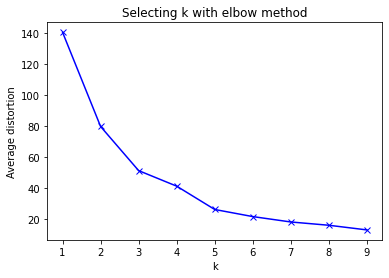

In [7]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with elbow method')
#plt.show()

According to the plot, the optimal number is 3

In [8]:
final_model = KMeans(n_clusters=3)
final_model.fit(clus_data.values)
prediction = final_model.predict(clus_data.values)
raw_data['GROUP'] = prediction

print(raw_data[['GROUP', 'PROBLEM_TYPE']])

    GROUP                       PROBLEM_TYPE
0       1                Admin Password Lost
1       1      Windows Reboots automatically
2       1  System not coming up after reboot
3       2                        Slow system
4       0         Internet Connectivity loss
5       1             New Installation hangs
6       1          Intermittent Blank Screen
7       2         Too many popups in Browser
8       2                Cannot find printer
9       1          Missing peripheral driver
10      0             Cannot detect keyboard
11      0                Cannot detect mouse
12      0        Head phone jack not working
13      2                     DVD read error
14      1       Cannot recover using restore
15      2               WIFI not functioning
16      1                Laptop not charging
17      1      Laptop loses charge very fast
18      1               Dark areas on screen
19      2             anti-virus not working


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff350c8b9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff350c8bfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff350c8b6d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff350c9a520>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff350c9a7f0>,
 'means': []}

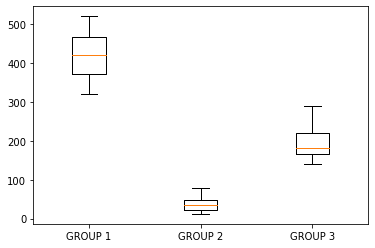

In [9]:
plt.boxplot([np.array(raw_data['COUNT'][raw_data.GROUP==0]),
np.array(raw_data['COUNT'][raw_data.GROUP==1]),
np.array(raw_data['COUNT'][raw_data.GROUP==2])],
labels=('GROUP 1', 'GROUP 2', 'GROUP 3'))

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3414822b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff341482850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff331343fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff341482df0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff341490100>,
 'means': []}

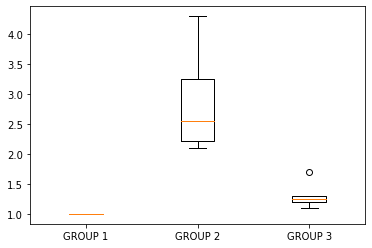

In [10]:
plt.boxplot([np.array(raw_data['AVG_CALLS_TO_RESOLVE'][raw_data.GROUP==0]),
np.array(raw_data['AVG_CALLS_TO_RESOLVE'][raw_data.GROUP==1]),
np.array(raw_data['AVG_CALLS_TO_RESOLVE'][raw_data.GROUP==2])],
labels=('GROUP 1', 'GROUP 2', 'GROUP 3'))

Creating box plots to analyse the clusters. we use 2 different columns to analyse - count and averge response time

Classifying a new data stream

In [12]:
new_data = np.array([50, 4.5, 200, 0.14, 0])
new_data = new_data.reshape(1, -1)
new_pred = final_model.predict(new_data)
print('Prediction is:', new_pred)

Prediction is: [1]


/Users/zaidfarooqui/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
